<a href="https://colab.research.google.com/github/radhika1603/INCLASSACTIVITIES/blob/main/MTAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

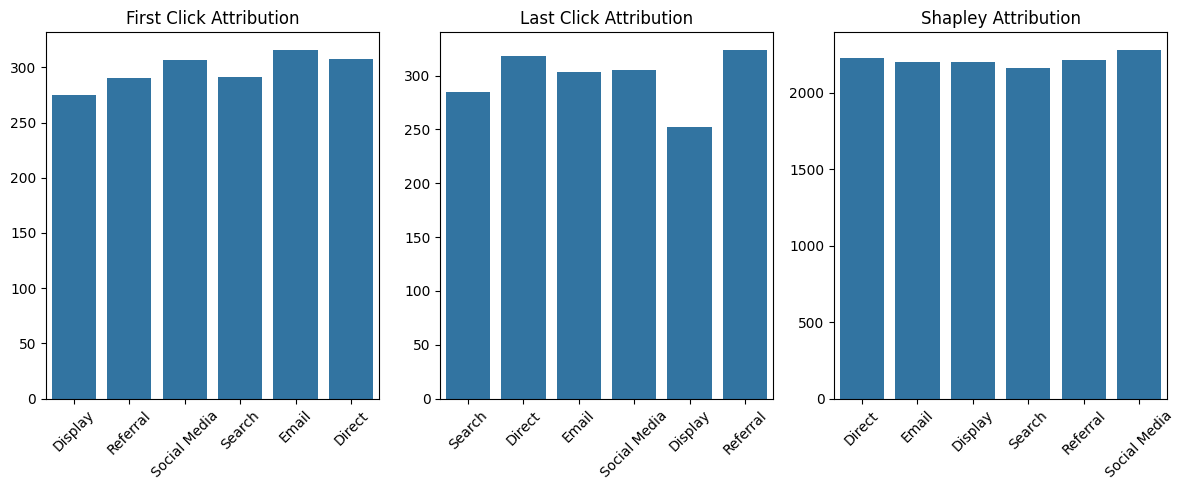

First Click Attribution: defaultdict(<class 'int'>, {'Display': 275, 'Referral': 290, 'Social Media': 307, 'Search': 291, 'Email': 316, 'Direct': 308})
Last Click Attribution: defaultdict(<class 'int'>, {'Search': 285, 'Direct': 318, 'Email': 303, 'Social Media': 305, 'Display': 252, 'Referral': 324})
Shapley Attribution: defaultdict(<class 'float'>, {'Direct': 2226.0830555555544, 'Email': 2202.418333333332, 'Display': 2198.4794444444437, 'Search': 2164.665833333333, 'Referral': 2212.5186111111125, 'Social Media': 2281.6513888888876})


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from itertools import combinations

def first_click_attribution(df):
    first_click = defaultdict(int)
    for journey, conversion in zip(df['journey'], df['converted']):
        if conversion == 1:
            first_channel = eval(journey)[0]
            first_click[first_channel] += 1
    return first_click

def last_click_attribution(df):
    last_click = defaultdict(int)
    for journey, conversion in zip(df['journey'], df['converted']):
        if conversion == 1:
            last_channel = eval(journey)[-1]
            last_click[last_channel] += 1
    return last_click

def shapley_attribution(df):
    channel_contributions = defaultdict(float)

    for journey, conversion in zip(df['journey'], df['converted']):
        if conversion == 1:
            journey = eval(journey)
            unique_channels = list(set(journey))
            num_channels = len(unique_channels)

            for channel in unique_channels:
                marginal_contributions = []

                for i in range(num_channels):
                    for subset in combinations(unique_channels, i):
                        subset = set(subset)
                        with_channel = subset | {channel}
                        marginal_contributions.append(1 / (len(with_channel)))

                channel_contributions[channel] += sum(marginal_contributions) / num_channels

    return channel_contributions

# Load dataset
df = pd.read_csv("/content/multi_touch_attribution_data.csv")

# Compute attributions
first_click = first_click_attribution(df)
last_click = last_click_attribution(df)
shapley_values = shapley_attribution(df)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=list(first_click.keys()), y=list(first_click.values()))
plt.title("First Click Attribution")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=list(last_click.keys()), y=list(last_click.values()))
plt.title("Last Click Attribution")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=list(shapley_values.keys()), y=list(shapley_values.values()))
plt.title("Shapley Attribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print results
print("First Click Attribution:", first_click)
print("Last Click Attribution:", last_click)
print("Shapley Attribution:", shapley_values)